In [4]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
name='rl_ttl_strategy_'
directory= 'results/rl_ttl_strategy/cache_capacity_1000/2019_05_26_11_38'
caching_strategy_dir = f'{directory}/ttl_strategy'

In [5]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log',
                       names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit', 'cache_miss']
                       )
stats_df[['cache_hit','cache_miss']] = stats_df[['cache_hit', 'cache_miss']].astype(int)
stats_df.groupby((stats_df.index // 10000)).mean().plot()

FileNotFoundError: [Errno 2] File b'results/rl_ttl_strategy/cache_capacity_1000/2019_05_24_20_02/cache_hit_logger.log' does not exist: b'results/rl_ttl_strategy/cache_capacity_1000/2019_05_24_20_02/cache_hit_logger.log'

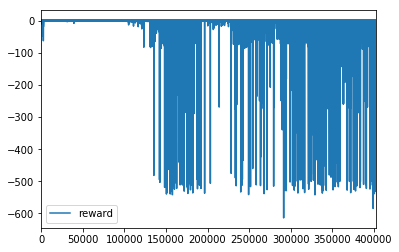

In [36]:
# Useful to compare various RL architecture 
# episode_reward_df = pd.read_csv(f'{eviction_strategy_dir}/{name}reward_logger.log', names=['reward'], parse_dates=True)
# ax = episode_reward_df.resample('5T').sum().plot(title='Sum of reward achieved')
# ax.set_xlabel("Time")
# ax.set_ylabel("Reward")
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'episode','reward'], usecols=['reward'])
episode_reward_df.plot()


Text(0.5, 0, 'Steps')

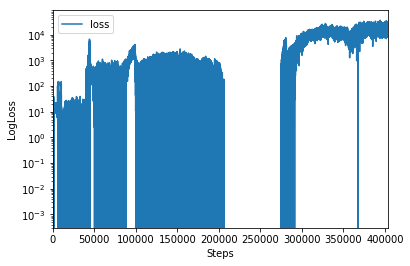

In [21]:

# losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['loss'], parse_dates=True)
# 
# ax = losses_df.resample('5T').sum().plot(logy=True)
# ax.set_ylabel("Loss")
# ax.set_xlabel("Time")

losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','episode','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")


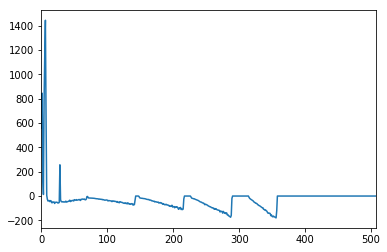

In [35]:
observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log', names=['timestamp','episode','observation', 'key', 'ttl', 'real_ttl', 'hits'], usecols=['ttl', 'real_ttl'])
diff = observations_df['ttl'] - observations_df['real_ttl']
diff.groupby((diff.index // 1000)).mean().plot()
# diff.plot()

In [19]:
observations_df.groupby('ttl').count()

,real_ttl
ttl,
-0.000107,5
0.000000,489525
0.000054,86
0.000107,166
0.000161,114
0.000215,67
0.000268,34
0.000322,49
0.000376,27
